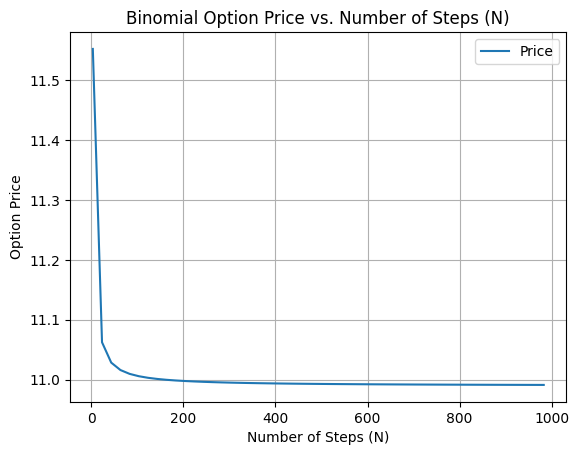

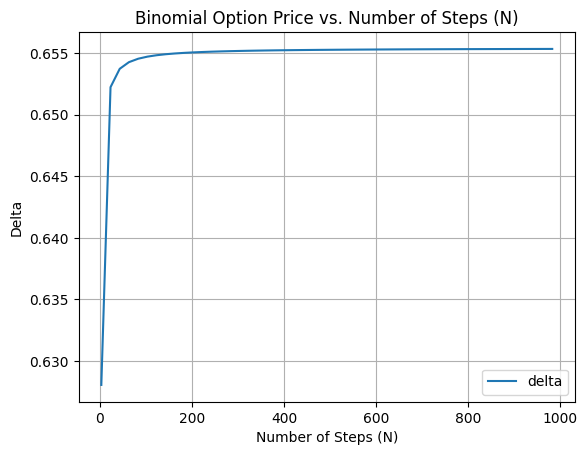

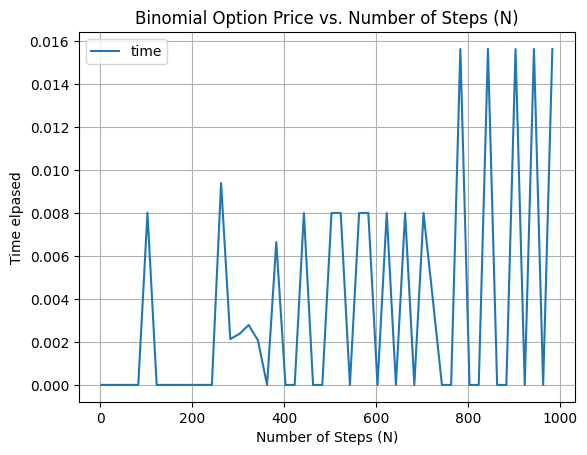

In [ ]:
import numpy as np
import time
from scipy.stats import norm
import pandas as pd
import matplotlib.pyplot as plt


def black_scholes_call_price(S0, K, T, r, sigma):
    """
    Computes the Black-Scholes price for a European call option.
    """
    if T <= 0:
        return max(S0 - K, 0.0)

    d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

def call_option_price_and_delta(K, R, T, S0, N, sigma):
    """
    Prices a European call using a CRR-calibrated N-step binomial tree
    and computes delta at the root node in order O(N)

    Parameters:
    K     : Strike price
    R     : Risk-free rate (continuous compounding)
    T     : Time to maturity (years)
    S0    : Spot price
    N     : Number of time steps
    sigma : Volatility (annualized std dev)

    Returns:
    C0, Delta0 : Option price and delta at the root
    """
    dt = T / N
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    A = np.exp(R * dt)
    D = 1 / A
    q = (A - d) / (u - d)

    # Terminal stock prices and payoffs
    i = np.arange(N + 1)
    prices = S0 * (u ** i) * (d ** (N - i))
    values = np.maximum(prices - K, 0.0)

    # Roll back through the tree
    for step in range(N):
        if step == N - 1:
            child_values = values.copy()
        values = (q * values[1:] + (1 - q) * values[:-1]) * D

    C0 = values[0]

    # Delta at root
    Su = S0 * u
    Sd = S0 * d
    Cu = child_values[1]
    Cd = child_values[0]
    Delta0 = (Cu - Cd) / (Su - Sd)

    return C0, Delta0

if __name__ == "__main__":
    S0 = 100
    K = 100
    T = 1.0
    R = 0.06
    sigma = 0.2
    depth = 1000 # how many layers of the tree to use

    data = []
    for N in range(3, 1001, 20):
        start = time.time()
        price, delta = call_option_price_and_delta(K, R, T, S0, N, sigma)
        elpased = time.time() - start
        data.append((price, delta, elpased,N))

    df = pd.DataFrame(data, columns=['Price','delta', 'time', 'N'])

    # Plot price vs itteration
    df.plot(x='N', y='Price', title='Binomial Option Price vs. Number of Steps (N)', grid=True)
    plt.ylabel('Option Price')
    plt.xlabel('Number of Steps (N)')
    plt.show()

    # Plot itteration vs delta
    df.plot(x='N', y='delta', title='Binomial Option Price vs. Number of Steps (N)', grid=True)
    plt.ylabel('Delta')
    plt.xlabel('Number of Steps (N)')
    plt.show()

    # Plot time vs itteration
    df.plot(x='N', y='time', title='Binomial Option Price vs. Number of Steps (N)', grid=True)
    plt.ylabel('Time elpased')
    plt.xlabel('Number of Steps (N)')
    plt.show()





In [37]:
bs_price = black_scholes_call_price(S0, K, T, R, sigma)
print(f"\nBlack-Scholes Price: {bs_price:.4f}")

tree_price = round(df['Price'][len(df)-1],4)
print(f'Binomaial tree price {depth} itterations {tree_price}')


Black-Scholes Price: 10.9895
Binomaial tree price 1000 itterations 10.9912
